In [1]:
using DataFrames, CSV, Plots, LaTeXStrings

In [24]:


# Function to initialize the lattice with random spins
function init_st(n::Int, p::Float64)
    return rand([-1, 1], n, n)
end

# Function to handle periodic boundary conditions
function boundary(i,n)
    if i<1
        return n
    elseif i>n
        return 1
    else
        return i
    end
end

# Parameters
n = 100
trials = 1200
time = 800
MCS = n * n

# Initialize persistence probability array
perp = zeros(time)

# Loop over trials
for trial = 1:trials
    # Initialize lattice
    L = init_st(n, 0.5)
    INIT = copy(L)
    
    # Initialize array to track non-persistent indices
    #npers_ind = []
    nm=ones(n,n)
    n_tot=zeros(time)
    # Loop over time steps
    for m = 1:time * MCS
        # Choose a random lattice point
        i = rand(1:n)
        j = rand(1:n)
        # Calculate energy difference due to flipping spin (Metropolis algorithm)
        S= -2*L[i,j]*(L[boundary(i+1,n),j]+L[boundary(i-1,n),j]+L[i,boundary(j+1,n)]+L[i,boundary(j-1,n)])
        # Calculate energy difference
        E_diff = -S
        # Decide whether to flip spin
        if E_diff < 0
            L[i, j] *= -1
        elseif E_diff ==0
            cnt=rand()
            if cnt<0.5
                L[i, j] *= -1
            end
        end

        if m%MCS==0
            for i1=1:n
                for j1=1:n
                    if nm[i1,j1]==1
                        nm[i1,j1] = (L[i1,j1]*INIT[i1,j1]+1)/2
                    end
                end
            end
            n_tot[div(m,MCS)]=sum(nm)/(n*n)
        end
    end
    perp = perp + n_tot
end

# Average persistence probability over trials
perp /= trials

# Prepare DataFrame for persistence probabilities
df = DataFrame(pp = perp)

# Write results to CSV file
CSV.write("persistence_$n time=$time.csv", df)


"persistence_100 time=800.csv"

In [2]:
using LsqFit
df=CSV.read("persistence_100 time=800.csv", DataFrame)
f(x,c) = -c[1].*x .+c[2]
fit11=curve_fit(f, log.(1:800), log.(df[!,1]), [-0.22, -0.33])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.22537162212120707, -0.33123437844366915], [-0.024796510575969655, -0.019269457634167764, -0.00876568186517912, -0.00243783856798907, 0.0011198611523433044, 0.0028690281577264942, 0.003826714592854552, 0.004350892556361785, 0.00461285986465898, 0.004694322119996652  …  1.7648375000289818e-5, 1.1808268517876641e-5, 1.2675316601651332e-5, 3.00644134521022e-6, -2.570100238852291e-6, -3.915087505301784e-7, 9.024539220803263e-6, 5.7997241831309054e-6, 2.1849090132919358e-5, 1.6351395559111026e-5], [0.0 0.9999999999960525; -0.6931471805584783 0.9999999999960525; … ; -6.683360945769184 0.9999999999868854; -6.684611727688185 1.0000000000052196], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [4]:
fit11.param

2-element Vector{Float64}:
  0.22537162212120707
 -0.33123437844366915

In [5]:
standard_errors(fit11)

2-element Vector{Float64}:
 4.7955512006457174e-5
 0.0002768999260336326

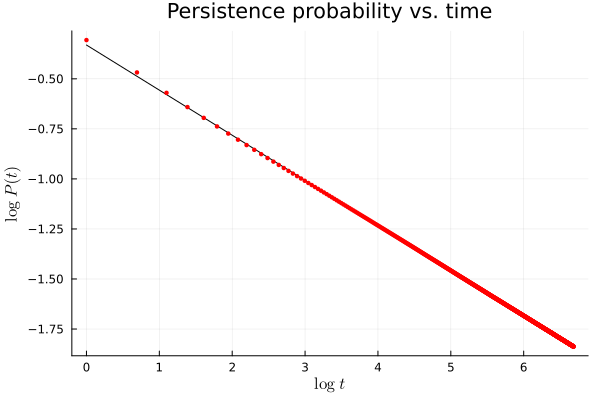

In [6]:
plot()
plot!(log.(1:800), f(log.(1:800), fit11.param), label="", c="black")
scatter!(log.(1:800), log.(df[!,1]), shape=:circle, ms=2.5, msw=0, label="", xlabel=L"\log \ t", ylabel=L"\log \ P(t)",c="red", title="Persistence probability vs. time")

In [36]:
savefig("pers_latt.svg")

"/home/shaggy1304/IISER/IAS SRFP/persistence/pers_latt.svg"